In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr


In [2]:
df1= pd.read_csv("1- global-plastics-production.csv")

In [3]:
'''
df1-4: dataset from kaggle named "Plastic Pollution"
Momeni, M., “Plastic pollution”, Kaggle, 2023  
https://www.kaggle.com/datasets/imtkaggleteam/plastic-pollution?resource=download 

'''

'\ndf1-4: dataset from kaggle named "Plastic Pollution"\n'

In [4]:
df1_cleaned = df1.dropna()

Text(0, 0.5, 'global-plastics-production (hundred million kg per year)')

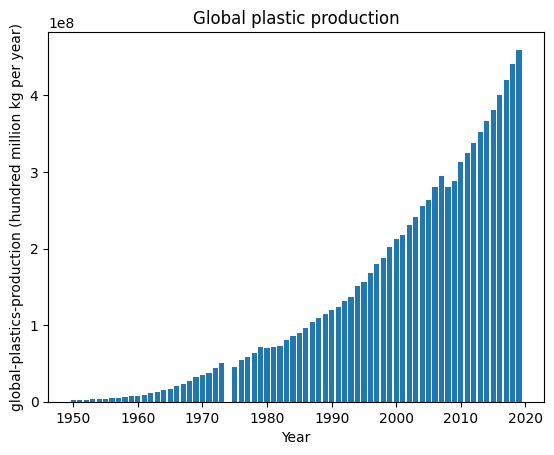

In [5]:
plt.bar(df1_cleaned['Year'],df1_cleaned['Annual plastic production between 1950 and 2019'])
plt.title('Global plastic production')
plt.xlabel('Year')
plt.ylabel('global-plastics-production (hundred million kg per year)')

In [6]:
# Add the missing year (1974) with a NaN value
data = df1.set_index('Year').reindex(range(1950, 2020)).reset_index()

# .interpolate(): Interpolate to fill the missing value for 1974
data['Annual plastic production between 1950 and 2019'] =data['Annual plastic production between 1950 and 2019'].interpolate()

print(data.loc[data['Year'] == 1974])

    Year Entity Code  Annual plastic production between 1950 and 2019
24  1974    NaN  NaN                                       48500000.0


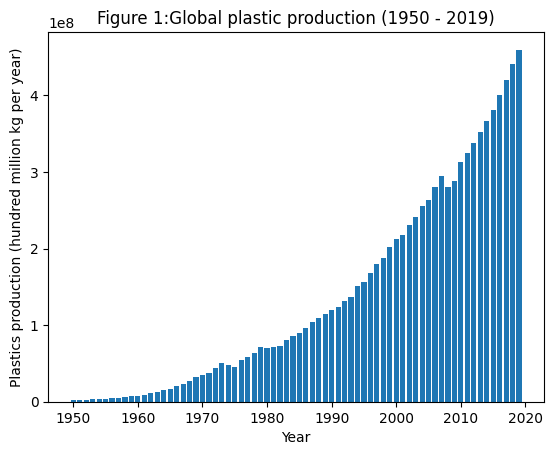

In [7]:
plt.figseize =(10.6) 
plt.bar(data['Year'],data['Annual plastic production between 1950 and 2019'])
plt.title('Figure 1:Global plastic production (1950 - 2019)')
plt.xlabel('Year')
plt.ylabel('Plastics production (hundred million kg per year)')
plt.grid(False)

In [8]:
correlation, p_value = pearsonr(df1['Year'], df1['Annual plastic production between 1950 and 2019'])

print(f"Pearson correlation coefficient: {correlation}")
print(f"P-value: {p_value}")

Pearson correlation coefficient: 0.9470386866302982
P-value: 9.054410815364769e-35


In [9]:
# Correlation coefficient
#x starts from 1950, 1 = 10yrs
#y: approximate numbers in milllions

x = [0,1,2,3,4,5,6,7]
y = [2, 8, 35, 70, 120, 213, 313, 460]



# Calculate r value
correlation_matrix = np.corrcoef(x, y)
rv1 = correlation_matrix[0, 1]
print(f"Entire Correlation coefficient (r)1950-2019: {rv1}")


x50_80 = [0,1,2,3]
y50_80 = [2,8,35,70]
correlation_matrix = np.corrcoef(x50_80, y50_80)
rv2 = correlation_matrix[0, 1]
print(f"Correlation coefficient (r)1950-1980: {rv2}")


x80_00 = [0,1,2]
y80_00 = [70, 120, 213]
correlation_matrix = np.corrcoef(x80_00, y80_00)
rv3 = correlation_matrix[0, 1]
print(f"Correlation coefficient (r)1980-2000: {rv3}")

x00_19 = [0,1,2]
y00_19 = [213,313,460]
correlation_matrix = np.corrcoef(x00_19, y00_19)
rv4 = correlation_matrix[0, 1]
print(f"Correlation coefficient (r)2000-2019: {rv4}")




Entire Correlation coefficient (r)1950-2019: 0.9427917039104364
Correlation coefficient (r)1950-1980: 0.9613740491368894
Correlation coefficient (r)1980-2000: 0.9852623097949474
Correlation coefficient (r)2000-2019: 0.9940194526818468


In [10]:


# Given data
x = [0, 1, 2, 3, 4, 5, 6, 7]
y = [2, 8, 35, 70, 120, 213, 313, 460]

# Loop through pairs of consecutive values and calculate r
for i in range(len(x) - 1):
    x_pair = x[i:i+2]
    y_pair = y[i:i+2]
    r_value, _ = pearsonr(x_pair, y_pair)
    print(f"correlation coefficient (r) for x{[x_pair[0], x_pair[1]]} and y{[y_pair[0], y_pair[1]]}: {r_value}")

# The correlation coefficient in each decade: r = 1

correlation coefficient (r) for x[0, 1] and y[2, 8]: 1.0
correlation coefficient (r) for x[1, 2] and y[8, 35]: 1.0
correlation coefficient (r) for x[2, 3] and y[35, 70]: 1.0
correlation coefficient (r) for x[3, 4] and y[70, 120]: 1.0
correlation coefficient (r) for x[4, 5] and y[120, 213]: 1.0
correlation coefficient (r) for x[5, 6] and y[213, 313]: 1.0
correlation coefficient (r) for x[6, 7] and y[313, 460]: 1.0


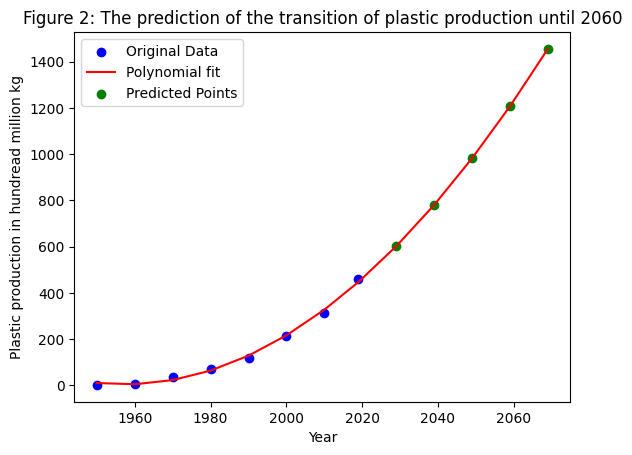

In [11]:


# Given data
x = np.array([1950, 1960, 1970, 1980, 1990, 2000, 2010, 2019])
y = np.array([2, 8, 35, 70, 120, 213, 313, 460])

# Fit a polynomial of degree 2 (quadratic fit)
coefficients = np.polyfit(x, y, 2)
poly = np.poly1d(coefficients)

# Number of steps for prediction
num_predictions = 5  # Predict next 5 values for x = 8, 9, 10, 11, 12

# Store predicted values and extended data
x_extended = x.copy()
y_extended = y.copy()

# Predict and update the correlation for each new value
for i in range(num_predictions):
    next_x = x_extended[-1] + 10  # The next x value
    predicted_y = poly(next_x)   # Predict the corresponding y value
    
    # Add the predicted point to the data
    x_extended = np.append(x_extended, next_x)
    y_extended = np.append(y_extended, predicted_y)
    
    # Calculate the updated correlation
    correlation_matrix = np.corrcoef(x_extended, y_extended)
    r_value = correlation_matrix[0, 1]
    

# Optional: Plotting the data and polynomial fit with extended predictions
plt.scatter(x, y, color='blue', label='Original Data')
plt.plot(x_extended, poly(x_extended), color='red', label='Polynomial fit')
plt.scatter(x_extended[-num_predictions:], y_extended[-num_predictions:], color='green', label='Predicted Points')
plt.legend()
plt.xlabel('Year')
plt.ylabel('Plastic production in hundread million kg')
plt.title('Figure 2: The prediction of the transition of plastic production until 2060')

plt.grid(False)



#⚠️[CAUTION!]⚠️
#DATA 2 HAS AN UNCERTAINTY IN THE VARIABLE OF  'Share of global plastics emitted to ocean'
#THE VALUE MIGHT BE THE PERCENTAGE BUT NO CLARIFICATION IS GAINED 

In [12]:
df2 = pd.read_csv("2- share-of-global-plastic-waste-emitted-to-the-ocean.csv", index_col = 0)

In [13]:
p0 = df2[df2['Share of global plastics emitted to ocean'] == 0]
# A list of countries where NO plastic pollution to the ocean is below
p0

,Code,Year,Share of global plastics emitted to ocean
Entity,,,
Bahrain,BHR,2019,0.0
Burkina Faso,BFA,2019,0.0
Cape Verde,CPV,2019,0.0
Comoros,COM,2019,0.0
Finland,FIN,2019,0.0
Iceland,ISL,2019,0.0
Kiribati,KIR,2019,0.0
Lesotho,LSO,2019,0.0
Maldives,MDV,2019,0.0


In [14]:
nul_code = df2[df2['Code'].isnull()]
print(nul_code)

              Code  Year  Share of global plastics emitted to ocean
Entity                                                             
Africa         NaN  2019                                   7.989317
Asia           NaN  2019                                  80.993570
EU-27          NaN  2019                                   0.220224
Europe         NaN  2019                                   0.595431
Macau          NaN  2019                                   0.034815
Micronesia     NaN  2019                                   0.003778
North America  NaN  2019                                   4.499121
Oceania        NaN  2019                                   0.370715
Saint Martin   NaN  2019                                   0.000000
Sint Maarten   NaN  2019                                   0.000000
South America  NaN  2019                                   5.513253


In [15]:
df2_cleaned = df2.dropna()

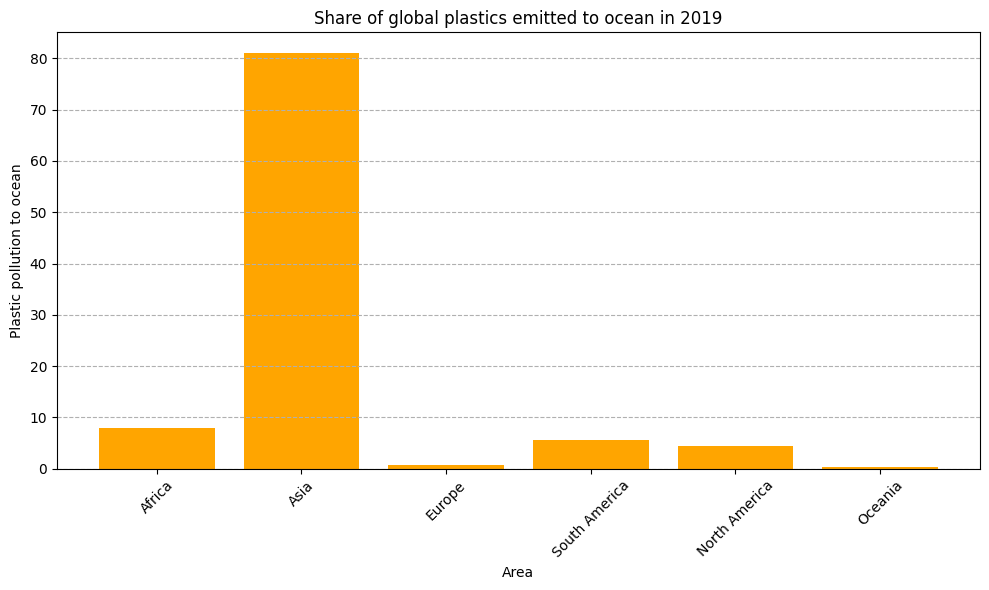

In [16]:
# The number of plastic emittion in following zones are integrated respectively:
# Oceania(Oceania and Micronesia), Europe(Europe and EU-27), Asiaa(Asia and Macau)

data = {
    'Area':['Africa', 'Asia', 'Europe', 'South America', 'North America', 'Oceania'],
    'Plastic Emittion':[7.989317, 81.028385, 0.815655, 5.513253, 4.499121, 0.40553]
}

df2_zone = pd.DataFrame(data)
plt.figure(figsize=(10, 6))

plt.bar(df2_zone['Area'], df2_zone['Plastic Emittion'], color='orange')


plt.title('Share of global plastics emitted to ocean in 2019')
plt.xlabel('Area')
plt.ylabel('Plastic pollution to ocean')


plt.grid(axis='y', linestyle='--')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

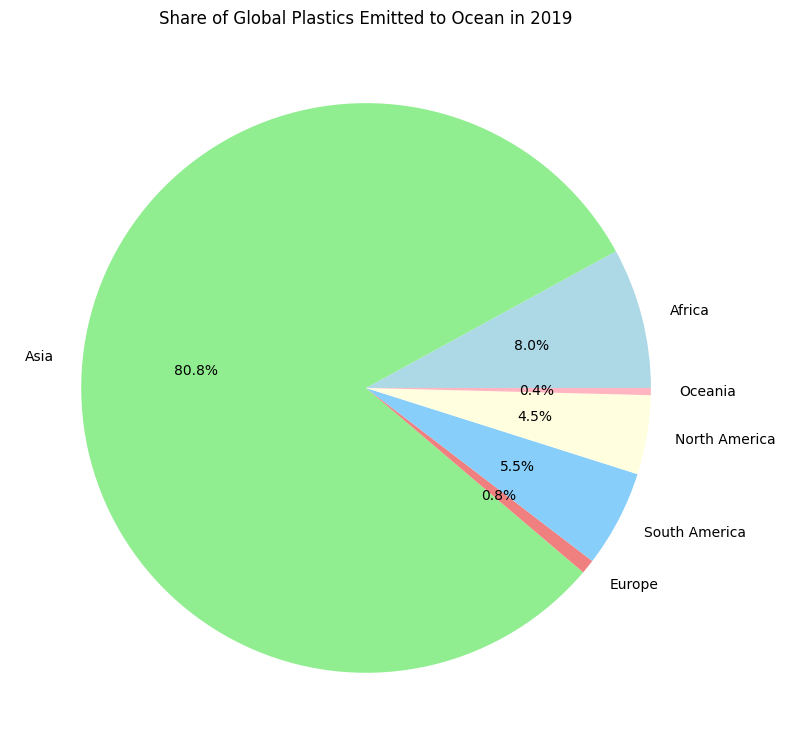

In [17]:
# The number of plastic emission in the following zones are integrated respectively:
# Oceania (Oceania and Micronesia), Europe (Europe and EU-27), Asia (Asia and Macau)

data = {
    'Area': ['Africa', 'Asia', 'Europe', 'South America', 'North America', 'Oceania'],
    'Plastic Emittion': [7.989317, 81.028385, 0.815655, 5.513253, 4.499121, 0.40553]
}

df2_zone = pd.DataFrame(data)

plt.figure(figsize=(8, 8))

plt.pie(df2_zone['Plastic Emittion'], labels=df2_zone['Area'], autopct='%1.1f%%', colors=['lightblue', 'lightgreen', 'lightcoral', 'lightskyblue', 'lightyellow', 'lightpink'])

plt.title('Share of Global Plastics Emitted to Ocean in 2019')

plt.tight_layout()


In [18]:
sum_area = df2_zone['Plastic Emittion'].sum()
sum_area
#This data is not out of 100% but nearly

100.25126100000001

In [19]:
total_sum = df2['Share of global plastics emitted to ocean'].sum()
total_sum

200.181631073

In [20]:
df3 = pd.read_csv("3- share-plastic-fate.csv")
'''
landfill etc
'''

'\nlandfill etc\n'

In [21]:
list[df3]

list[                   Entity      Code  Year  \
0    Americas (excl. USA)       NaN  2000   
1    Americas (excl. USA)       NaN  2001   
2    Americas (excl. USA)       NaN  2002   
3    Americas (excl. USA)       NaN  2003   
4    Americas (excl. USA)       NaN  2004   
..                    ...       ...   ...   
195                 World  OWID_WRL  2015   
196                 World  OWID_WRL  2016   
197                 World  OWID_WRL  2017   
198                 World  OWID_WRL  2018   
199                 World  OWID_WRL  2019   

     Share of waste recycled from total regional waste  \
0                                             4.721963   
1                                             4.972505   
2                                             5.227469   
3                                             5.482511   
4                                             5.740007   
..                                                 ...   
195                                           8.

In [22]:
df3.describe(include='all')

,Entity,Code,Year,Share of waste recycled from total regional waste,Share of waste incinerated from total regional waste,Share of littered and mismanaged from total regional waste,Share of waste landfilled from total regional waste
count,200,80,200.000000,200.000000,200.000000,200.000000,200.000000
unique,10,4,NaN,NaN,NaN,NaN,NaN
top,Americas (excl. USA),CHN,NaN,NaN,NaN,NaN,NaN
freq,20,20,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,2009.500000,6.364439,10.541669,32.703471,50.390421
std,NaN,NaN,5.780751,2.587257,9.132355,20.154271,16.346958
min,NaN,NaN,2000.000000,2.345074,0.000000,3.552523,25.098991
25%,NaN,NaN,2004.750000,4.362588,1.128528,10.955612,33.711067
50%,NaN,NaN,2009.500000,5.716396,11.009694,32.513705,51.571503
75%,NaN,NaN,2014.250000,7.920186,16.964613,45.841763,60.648984


In [23]:
column_names = df3.columns.tolist()

print(column_names)

['Entity', 'Code', 'Year', 'Share of waste recycled from total regional waste', 'Share of waste incinerated from total regional waste', 'Share of littered and mismanaged from total regional waste', 'Share of waste landfilled from total regional waste']


In [24]:
df3.columns = df3.columns.str.strip()  # Remove extra spaces from column names
print(df3.columns)  # Check the updated column names
# Convert unique countries to a list
unique_countries_list = df3['Entity'].unique().tolist()

# Print the result
print(unique_countries_list)
# Strip spaces from column names
df3.columns = df3.columns.str.strip()

# Convert unique countries to a list
unique_countries_list = df3['Entity'].unique().tolist()

# Print the result
print(unique_countries_list)



'''
Ignore this row:
Error occured due to an unavailability to list the values in the column 'Entity'

'''

Index(['Entity', 'Code', 'Year',
       'Share of waste recycled from total regional waste',
       'Share of waste incinerated from total regional waste',
       'Share of littered and mismanaged from total regional waste',
       'Share of waste landfilled from total regional waste'],
      dtype='object')
['Americas (excl. USA)', 'Asia (excl. China and India)', 'China', 'Europe', 'India', 'Middle East & North Africa', 'Oceania', 'Sub-Saharan Africa', 'United States', 'World']
['Americas (excl. USA)', 'Asia (excl. China and India)', 'China', 'Europe', 'India', 'Middle East & North Africa', 'Oceania', 'Sub-Saharan Africa', 'United States', 'World']


"\nIgnore this row:\nError occured due to an unavailability to list the values in the column 'Entity'\n\n"

In [25]:
df_2019 = df3[df3['Year'] == 2019]

print(df_2019)

                           Entity      Code  Year  \
19           Americas (excl. USA)       NaN  2019   
39   Asia (excl. China and India)       NaN  2019   
59                          China       CHN  2019   
79                         Europe       NaN  2019   
99                          India       IND  2019   
119    Middle East & North Africa       NaN  2019   
139                       Oceania       NaN  2019   
159            Sub-Saharan Africa       NaN  2019   
179                 United States       USA  2019   
199                         World  OWID_WRL  2019   

     Share of waste recycled from total regional waste  \
19                                            9.554245   
39                                            8.351267   
59                                           12.801141   
79                                           12.384406   
99                                           13.333093   
119                                           5.447833   
139       

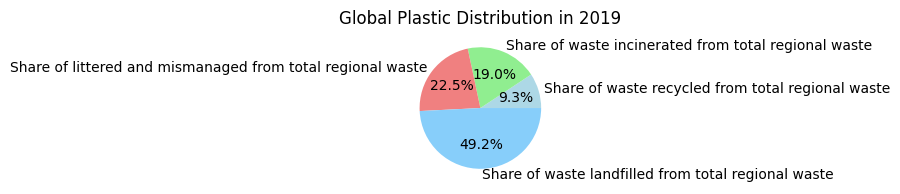

In [26]:
df3_w19 = {
    'categories':['Share of waste recycled from total regional waste', 'Share of waste incinerated from total regional waste', 'Share of littered and mismanaged from total regional waste', 'Share of waste landfilled from total regional waste'],
    'percentage':[9.292344, 19.048033, 22.454480, 49.205143]
}
df3w19 = pd.DataFrame(df3_w19)


plt.figure(figsize=(8, 8))

plt.pie(df3w19['percentage'], labels=df3w19['categories'], autopct='%1.1f%%', colors=['lightblue', 'lightgreen', 'lightcoral', 'lightskyblue', 'lightyellow', 'lightpink'])

plt.title('Global Plastic Distribution in 2019')

plt.tight_layout()
plt.show()

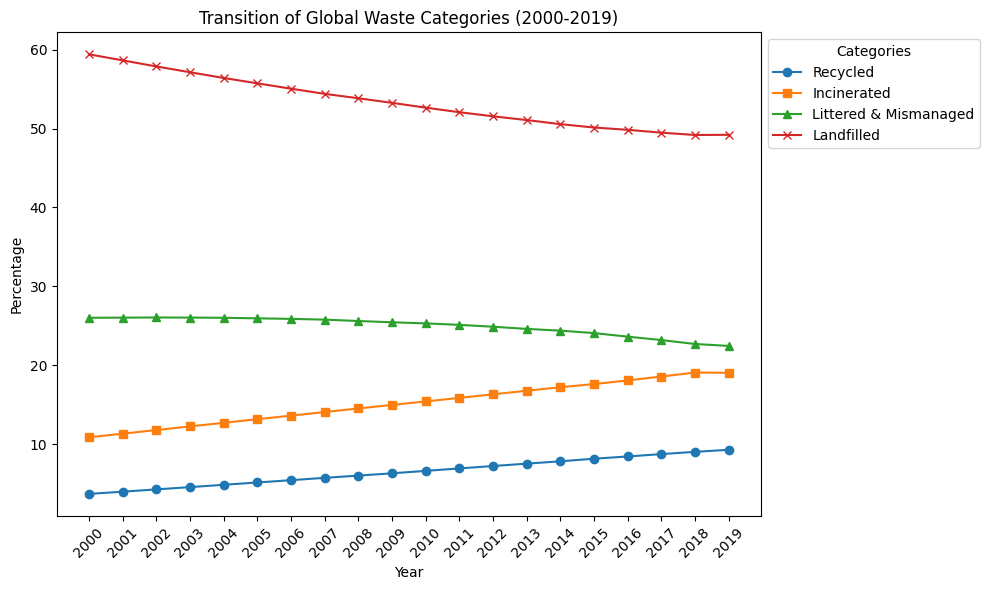

In [27]:
#Converting the value of 'Year' into string data type
df3['Year'] = df3['Year'].astype(str)

#Choosing the area
df3_w = df3[df3['Entity'] == "World"]

# Plotting
plt.figure(figsize=(10, 6))

# Plot each category
plt.plot(df3_w['Year'], df3_w['Share of waste recycled from total regional waste'], label='Recycled', marker='o')
plt.plot(df3_w['Year'], df3_w['Share of waste incinerated from total regional waste'], label='Incinerated', marker='s')
plt.plot(df3_w['Year'], df3_w['Share of littered and mismanaged from total regional waste'], label='Littered & Mismanaged', marker='^')
plt.plot(df3_w['Year'], df3_w['Share of waste landfilled from total regional waste'], label='Landfilled', marker='x')

# Labels and Title
plt.xlabel('Year')
plt.ylabel('Percentage')
plt.title('Transition of Global Waste Categories (2000-2019)')
plt.legend(title="Categories", bbox_to_anchor=(1, 1), loc='upper left')
plt.grid(False)
plt.xticks(rotation=45)

# Show plot
plt.tight_layout()
plt.show()



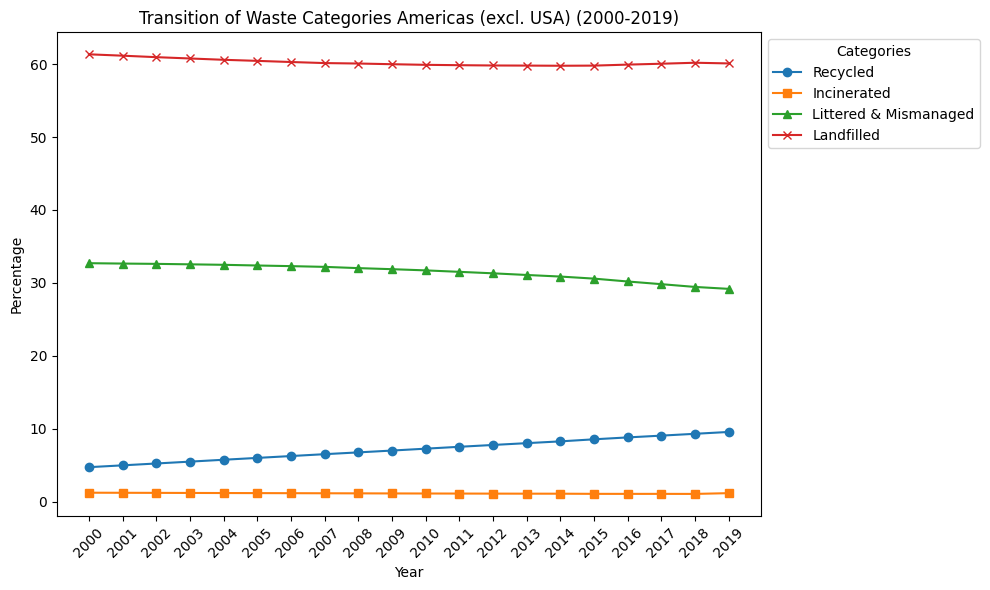

In [28]:
df3['Year'] = df3['Year'].astype(str)

df3_w = df3[df3['Entity'] == "Americas (excl. USA)"]

plt.figure(figsize=(10, 6))

plt.plot(df3_w['Year'], df3_w['Share of waste recycled from total regional waste'], label='Recycled', marker='o')
plt.plot(df3_w['Year'], df3_w['Share of waste incinerated from total regional waste'], label='Incinerated', marker='s')
plt.plot(df3_w['Year'], df3_w['Share of littered and mismanaged from total regional waste'], label='Littered & Mismanaged', marker='^')
plt.plot(df3_w['Year'], df3_w['Share of waste landfilled from total regional waste'], label='Landfilled', marker='x')


plt.xlabel('Year')
plt.ylabel('Percentage')
plt.title('Transition of Waste Categories Americas (excl. USA) (2000-2019)')
plt.legend(title="Categories", bbox_to_anchor=(1, 1), loc='upper left')
plt.grid(False)
plt.xticks(rotation=45)

plt.tight_layout()

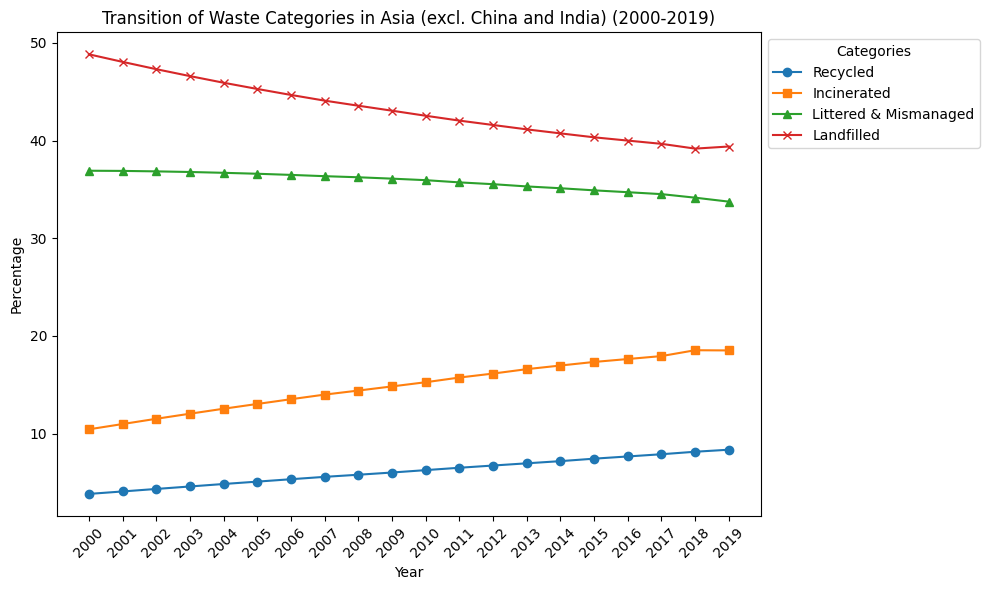

In [29]:
df3['Year'] = df3['Year'].astype(str)


df3_w = df3[df3['Entity'] == "Asia (excl. China and India)"]

plt.figure(figsize=(10, 6))

plt.plot(df3_w['Year'], df3_w['Share of waste recycled from total regional waste'], label='Recycled', marker='o')
plt.plot(df3_w['Year'], df3_w['Share of waste incinerated from total regional waste'], label='Incinerated', marker='s')
plt.plot(df3_w['Year'], df3_w['Share of littered and mismanaged from total regional waste'], label='Littered & Mismanaged', marker='^')
plt.plot(df3_w['Year'], df3_w['Share of waste landfilled from total regional waste'], label='Landfilled', marker='x')

plt.xlabel('Year')
plt.ylabel('Percentage')
plt.title('Transition of Waste Categories in Asia (excl. China and India) (2000-2019)')
plt.legend(title="Categories", bbox_to_anchor=(1, 1), loc='upper left')
plt.grid(False)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()



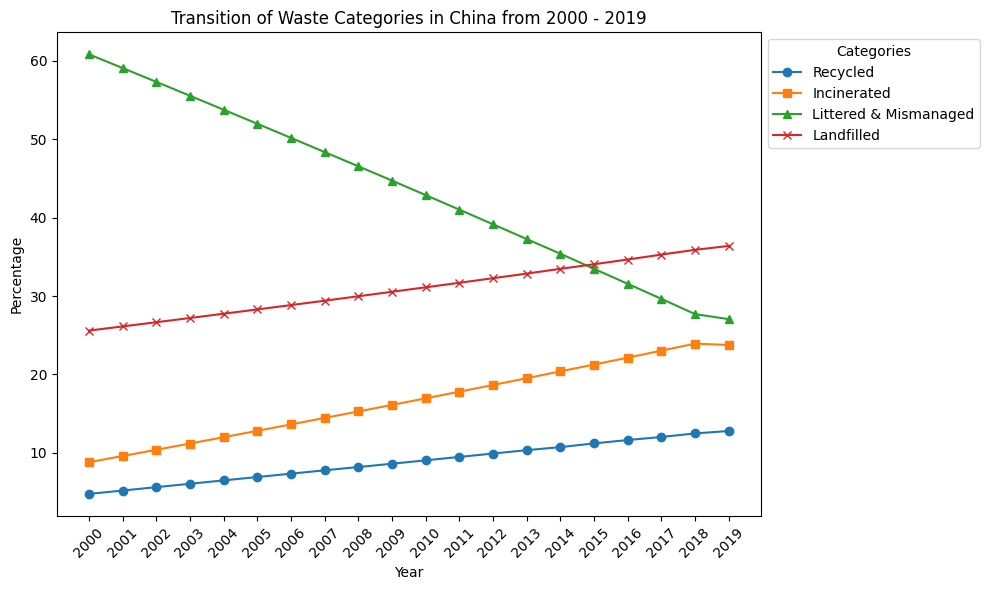

In [30]:
df3['Year'] = df3['Year'].astype(str)

df3_w = df3[df3['Entity'] == "China"]

plt.figure(figsize=(10, 6))


plt.plot(df3_w['Year'], df3_w['Share of waste recycled from total regional waste'], label='Recycled', marker='o')
plt.plot(df3_w['Year'], df3_w['Share of waste incinerated from total regional waste'], label='Incinerated', marker='s')
plt.plot(df3_w['Year'], df3_w['Share of littered and mismanaged from total regional waste'], label='Littered & Mismanaged', marker='^')
plt.plot(df3_w['Year'], df3_w['Share of waste landfilled from total regional waste'], label='Landfilled', marker='x')


plt.xlabel('Year')
plt.ylabel('Percentage')
plt.title('Transition of Waste Categories in China from 2000 - 2019')
plt.legend(title="Categories", bbox_to_anchor=(1, 1), loc='upper left')
plt.grid(False)
plt.xticks(rotation=45)


plt.tight_layout()

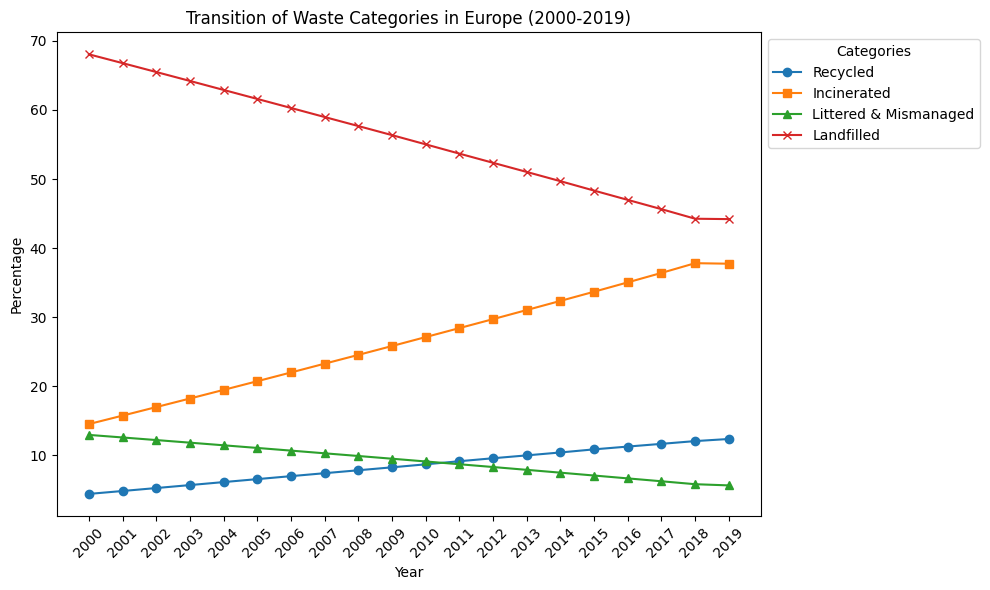

In [31]:
#Converting the value of 'Year' into string data type
df3['Year'] = df3['Year'].astype(str)

#Choosing the area
df3_w = df3[df3['Entity'] == "Europe"]

# Plotting
plt.figure(figsize=(10, 6))

# Plot each category
plt.plot(df3_w['Year'], df3_w['Share of waste recycled from total regional waste'], label='Recycled', marker='o')
plt.plot(df3_w['Year'], df3_w['Share of waste incinerated from total regional waste'], label='Incinerated', marker='s')
plt.plot(df3_w['Year'], df3_w['Share of littered and mismanaged from total regional waste'], label='Littered & Mismanaged', marker='^')
plt.plot(df3_w['Year'], df3_w['Share of waste landfilled from total regional waste'], label='Landfilled', marker='x')

# Labels and Title
plt.xlabel('Year')
plt.ylabel('Percentage')
plt.title('Transition of Waste Categories in Europe (2000-2019)')
plt.legend(title="Categories", bbox_to_anchor=(1, 1), loc='upper left')
plt.grid(False)
plt.xticks(rotation=45)

# Show plot
plt.tight_layout()
plt.show()



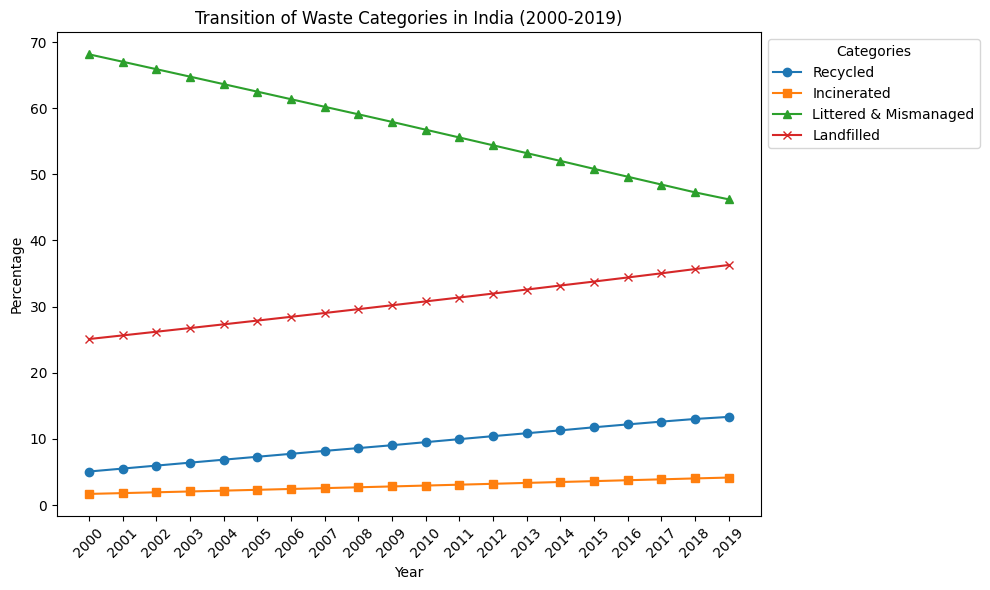

In [32]:
#Converting the value of 'Year' into string data type
df3['Year'] = df3['Year'].astype(str)

#Choosing the area
df3_w = df3[df3['Entity'] == "India"]

# Plotting
plt.figure(figsize=(10, 6))

# Plot each category
plt.plot(df3_w['Year'], df3_w['Share of waste recycled from total regional waste'], label='Recycled', marker='o')
plt.plot(df3_w['Year'], df3_w['Share of waste incinerated from total regional waste'], label='Incinerated', marker='s')
plt.plot(df3_w['Year'], df3_w['Share of littered and mismanaged from total regional waste'], label='Littered & Mismanaged', marker='^')
plt.plot(df3_w['Year'], df3_w['Share of waste landfilled from total regional waste'], label='Landfilled', marker='x')

# Labels and Title
plt.xlabel('Year')
plt.ylabel('Percentage')
plt.title('Transition of Waste Categories in India (2000-2019)')
plt.legend(title="Categories", bbox_to_anchor=(1, 1), loc='upper left')
plt.grid(False)
plt.xticks(rotation=45)

# Show plot
plt.tight_layout()
plt.show()



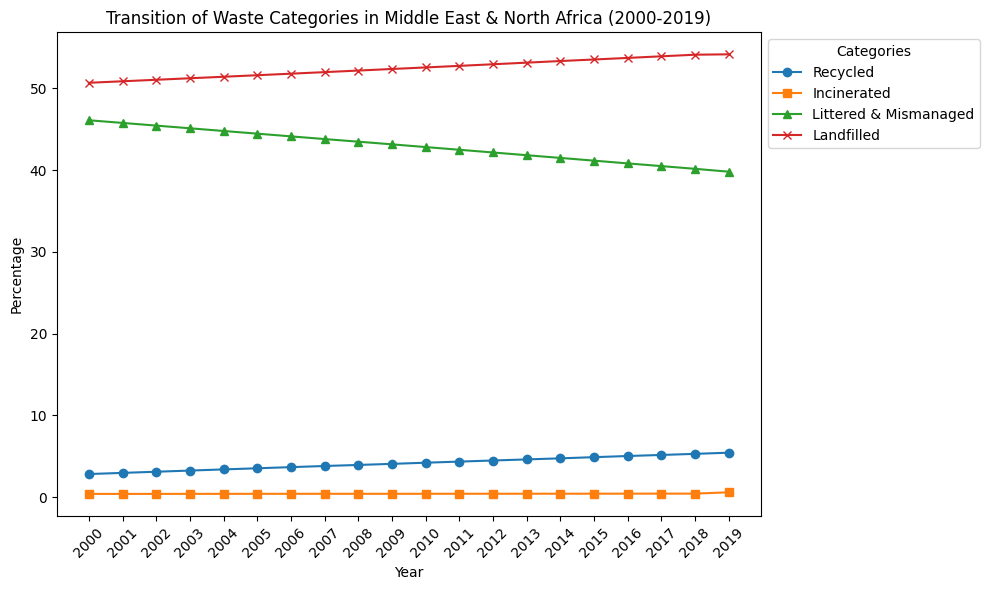

In [33]:
#Converting the value of 'Year' into string data type
df3['Year'] = df3['Year'].astype(str)

#Choosing the area
df3_w = df3[df3['Entity'] == "Middle East & North Africa"]

# Plotting
plt.figure(figsize=(10, 6))

# Plot each category
plt.plot(df3_w['Year'], df3_w['Share of waste recycled from total regional waste'], label='Recycled', marker='o')
plt.plot(df3_w['Year'], df3_w['Share of waste incinerated from total regional waste'], label='Incinerated', marker='s')
plt.plot(df3_w['Year'], df3_w['Share of littered and mismanaged from total regional waste'], label='Littered & Mismanaged', marker='^')
plt.plot(df3_w['Year'], df3_w['Share of waste landfilled from total regional waste'], label='Landfilled', marker='x')

# Labels and Title
plt.xlabel('Year')
plt.ylabel('Percentage')
plt.title('Transition of Waste Categories in Middle East & North Africa (2000-2019)')
plt.legend(title="Categories", bbox_to_anchor=(1, 1), loc='upper left')
plt.grid(False)
plt.xticks(rotation=45)

# Show plot
plt.tight_layout()
plt.show()



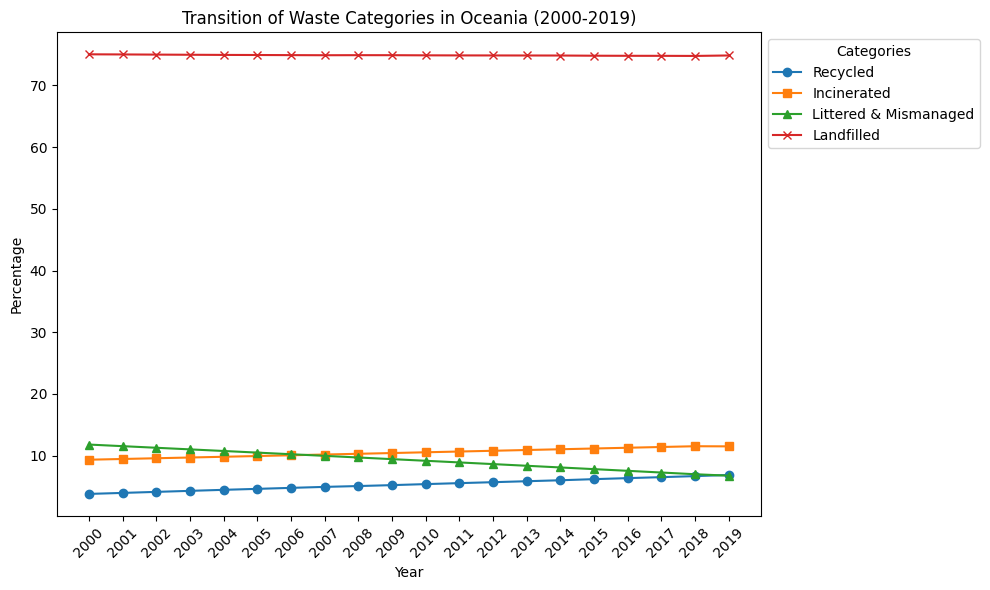

In [34]:
#Converting the value of 'Year' into string data type
df3['Year'] = df3['Year'].astype(str)

#Choosing the area
df3_w = df3[df3['Entity'] == "Oceania"]

# Plotting
plt.figure(figsize=(10, 6))

# Plot each category
plt.plot(df3_w['Year'], df3_w['Share of waste recycled from total regional waste'], label='Recycled', marker='o')
plt.plot(df3_w['Year'], df3_w['Share of waste incinerated from total regional waste'], label='Incinerated', marker='s')
plt.plot(df3_w['Year'], df3_w['Share of littered and mismanaged from total regional waste'], label='Littered & Mismanaged', marker='^')
plt.plot(df3_w['Year'], df3_w['Share of waste landfilled from total regional waste'], label='Landfilled', marker='x')

# Labels and Title
plt.xlabel('Year')
plt.ylabel('Percentage')
plt.title('Transition of Waste Categories in Oceania (2000-2019)')
plt.legend(title="Categories", bbox_to_anchor=(1, 1), loc='upper left')
plt.grid(False)
plt.xticks(rotation=45)

# Show plot
plt.tight_layout()
plt.show()



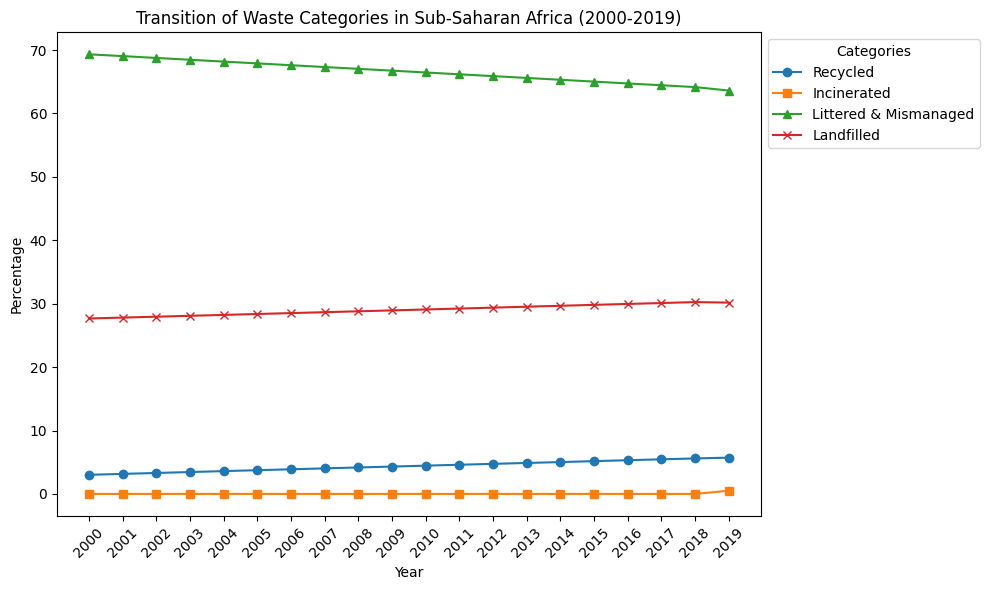

In [35]:
#Converting the value of 'Year' into string data type
df3['Year'] = df3['Year'].astype(str)

#Choosing the area
df3_w = df3[df3['Entity'] == "Sub-Saharan Africa"]

# Plotting
plt.figure(figsize=(10, 6))

# Plot each category
plt.plot(df3_w['Year'], df3_w['Share of waste recycled from total regional waste'], label='Recycled', marker='o')
plt.plot(df3_w['Year'], df3_w['Share of waste incinerated from total regional waste'], label='Incinerated', marker='s')
plt.plot(df3_w['Year'], df3_w['Share of littered and mismanaged from total regional waste'], label='Littered & Mismanaged', marker='^')
plt.plot(df3_w['Year'], df3_w['Share of waste landfilled from total regional waste'], label='Landfilled', marker='x')

# Labels and Title
plt.xlabel('Year')
plt.ylabel('Percentage')
plt.title('Transition of Waste Categories in Sub-Saharan Africa (2000-2019)')
plt.legend(title="Categories", bbox_to_anchor=(1, 1), loc='upper left')
plt.grid(False)
plt.xticks(rotation=45)

# Show plot
plt.tight_layout()
plt.show()



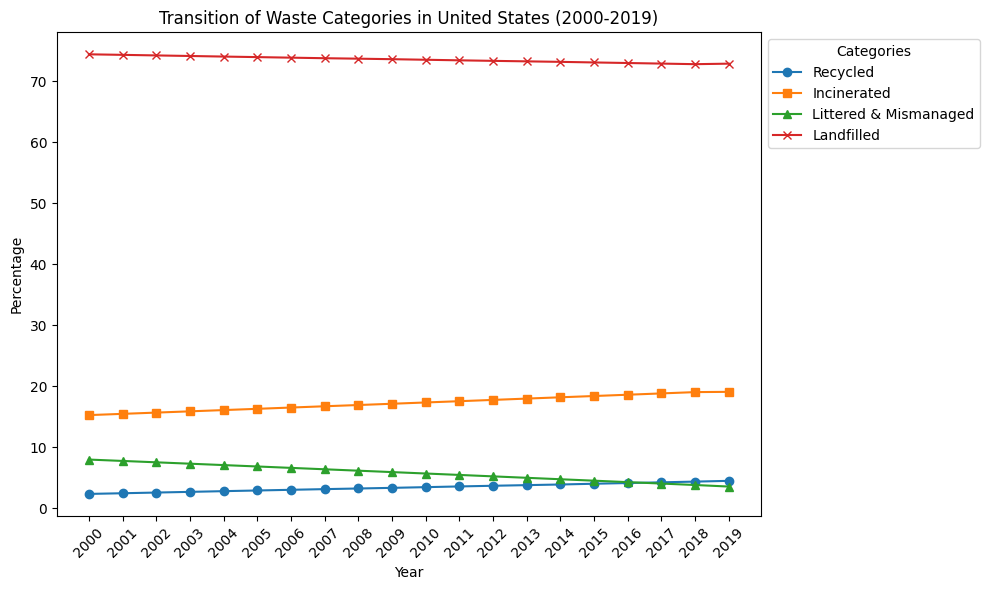

In [36]:
#Converting the value of 'Year' into string data type
df3['Year'] = df3['Year'].astype(str)

#Choosing the area
df3_w = df3[df3['Entity'] == "United States"]

# Plotting
plt.figure(figsize=(10, 6))

# Plot each category
plt.plot(df3_w['Year'], df3_w['Share of waste recycled from total regional waste'], label='Recycled', marker='o')
plt.plot(df3_w['Year'], df3_w['Share of waste incinerated from total regional waste'], label='Incinerated', marker='s')
plt.plot(df3_w['Year'], df3_w['Share of littered and mismanaged from total regional waste'], label='Littered & Mismanaged', marker='^')
plt.plot(df3_w['Year'], df3_w['Share of waste landfilled from total regional waste'], label='Landfilled', marker='x')

# Labels and Title
plt.xlabel('Year')
plt.ylabel('Percentage')
plt.title('Transition of Waste Categories in United States (2000-2019)')
plt.legend(title="Categories", bbox_to_anchor=(1, 1), loc='upper left')
plt.grid(False)
plt.xticks(rotation=45)

# Show plot
plt.tight_layout()
plt.show()



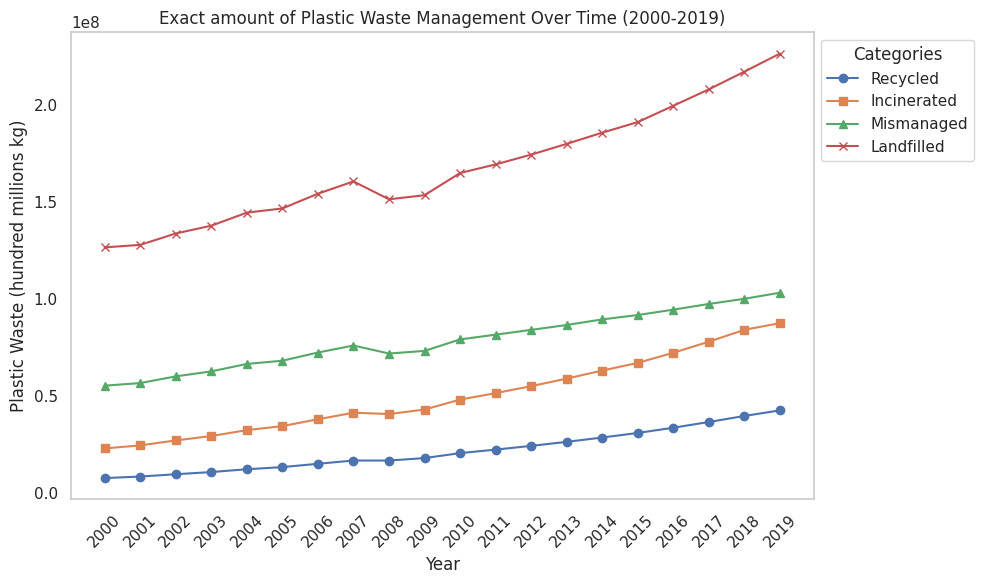

In [76]:
# Plotting the line graph for the plastic waste management categories
plt.figure(figsize=(10, 6))

# Plotting each category as a line
plt.plot(merged_df['year'], merged_df['recycled_plastic'], label='Recycled', marker='o')
plt.plot(merged_df['year'], merged_df['incinerated_plastic'], label='Incinerated', marker='s')
plt.plot(merged_df['year'], merged_df['mismanaged_plastic'], label='Mismanaged', marker='^')
plt.plot(merged_df['year'], merged_df['landfilled_plastic'], label='Landfilled', marker='x')

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Plastic Waste (hundred millions kg)')
plt.title('Exact amount of Plastic Waste Management Over Time (2000-2019)')
plt.legend(title="Categories", bbox_to_anchor=(1, 1), loc='upper left')

# Set x-axis ticks to be the actual years
plt.xticks(merged_df['year'], rotation=45)

# Show grid for better readability
plt.grid(False)

# Show the plot
plt.tight_layout()
plt.show()



In [38]:
df4 = pd.read_csv("4- mismanaged-plastic-waste-per-capita.csv")

df4

,Entity,Code,Year,Mismanaged plastic waste per capita (kg per year)
0,Africa,NaN,2019,10.465928
1,Albania,ALB,2019,24.239153
2,Algeria,DZA,2019,17.758995
3,Angola,AGO,2019,7.445279
4,Antigua and Barbuda,ATG,2019,6.463918
...,...,...,...,...
160,Vietnam,VNM,2019,11.536045
161,Western Sahara,ESH,2019,7.068729
162,World,OWID_WRL,2019,8.008551
163,Yemen,YEM,2019,10.004012


In [39]:
country = df4["Entity"].tolist()

In [40]:
country


['Africa',
 'Albania',
 'Algeria',
 'Angola',
 'Antigua and Barbuda',
 'Argentina',
 'Asia',
 'Australia',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belgium',
 'Belize',
 'Benin',
 'Bosnia and Herzegovina',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cape Verde',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Congo',
 'Costa Rica',
 "Cote d'Ivoire",
 'Croatia',
 'Cyprus',
 'Democratic Republic of Congo',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'East Timor',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Europe',
 'Fiji',
 'Finland',
 'France',
 'French Guiana',
 'Gabon',
 'Gambia',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Grenada',
 'Guadeloupe',
 'Guatemala',
 'Guinea',
 'Guinea-Bissau',
 'Guyana',
 'Haiti',
 'Honduras',
 'Hong Kong',
 'Iceland',
 'India',
 'Indonesia',
 'Iran',
 'Iraq',
 'Ireland',
 'Israel',
 'Italy',
 'Jamaica',
 'Japan',
 'Jordan',
 'Kazakh

In [41]:
code = df4["Code"].tolist()
code

[nan,
 'ALB',
 'DZA',
 'AGO',
 'ATG',
 'ARG',
 nan,
 'AUS',
 'BHS',
 'BHR',
 'BGD',
 'BRB',
 'BEL',
 'BLZ',
 'BEN',
 'BIH',
 'BRA',
 'BRN',
 'BGR',
 'BFA',
 'KHM',
 'CMR',
 'CAN',
 'CPV',
 'CHL',
 'CHN',
 'COL',
 'COM',
 'COG',
 'CRI',
 'CIV',
 'HRV',
 'CYP',
 'COD',
 'DNK',
 'DJI',
 'DMA',
 'DOM',
 'TLS',
 'ECU',
 'EGY',
 'SLV',
 'GNQ',
 'ERI',
 'EST',
 nan,
 'FJI',
 'FIN',
 'FRA',
 'GUF',
 'GAB',
 'GMB',
 'GEO',
 'DEU',
 'GHA',
 'GRC',
 'GRD',
 'GLP',
 'GTM',
 'GIN',
 'GNB',
 'GUY',
 'HTI',
 'HND',
 'HKG',
 'ISL',
 'IND',
 'IDN',
 'IRN',
 'IRQ',
 'IRL',
 'ISR',
 'ITA',
 'JAM',
 'JPN',
 'JOR',
 'KAZ',
 'KEN',
 'KIR',
 'KWT',
 'LVA',
 'LBN',
 'LSO',
 'LBR',
 'LBY',
 'LTU',
 'MDG',
 'MYS',
 'MDV',
 'MLT',
 'MHL',
 'MTQ',
 'MRT',
 'MUS',
 'MEX',
 'MCO',
 'MNE',
 'MAR',
 'MOZ',
 'MMR',
 'NAM',
 'NLD',
 'NZL',
 'NIC',
 'NGA',
 nan,
 'PRK',
 'NOR',
 nan,
 'OMN',
 'PAK',
 'PLW',
 'PSE',
 'PAN',
 'PNG',
 'PER',
 'PHL',
 'POL',
 'PRT',
 'PRI',
 'QAT',
 'REU',
 'ROU',
 'RUS',
 'KNA',
 'LCA',
 '

In [42]:
null_rows = df4[df4.isnull().any(axis=1)]

# Display the rows containing null values
print("\nRows containing null values:")
print(null_rows)


Rows containing null values:
            Entity Code  Year  \
0           Africa  NaN  2019   
6             Asia  NaN  2019   
45          Europe  NaN  2019   
105  North America  NaN  2019   
108        Oceania  NaN  2019   

     Mismanaged plastic waste per capita (kg per year)  
0                                            10.465928  
6                                             8.667235  
45                                            1.580226  
105                                           5.257716  
108                                           3.240268  


In [43]:
#Missing data of South Amrica
south_american_countries = ['Argentina', 'Brazil', 'Chile', 'Colombia', 'Ecuador', 
                            'Guyana', 'Paraguay', 'Peru', 'Suriname', 'Uruguay', 'Venezuela']
data = {
    'Country': ['Argentina', 'Brazil', 'Chile', 'Colombia', 'Ecuador', 
                'Guyana', 'Paraguay', 'Peru', 'Suriname', 'Uruguay', 'Venezuela'],
    'Value': [10.4, 15.6, 1.62, 1.7, 6.26, 35.2, 5.62, 4.31, 39.47, 26.75, 23.54]
}

# Create DataFrame
df = pd.DataFrame(data)

# Display DataFrame
print(df)


      Country  Value
0   Argentina  10.40
1      Brazil  15.60
2       Chile   1.62
3    Colombia   1.70
4     Ecuador   6.26
5      Guyana  35.20
6    Paraguay   5.62
7        Peru   4.31
8    Suriname  39.47
9     Uruguay  26.75
10  Venezuela  23.54


In [44]:
#Median of South America is 10.4

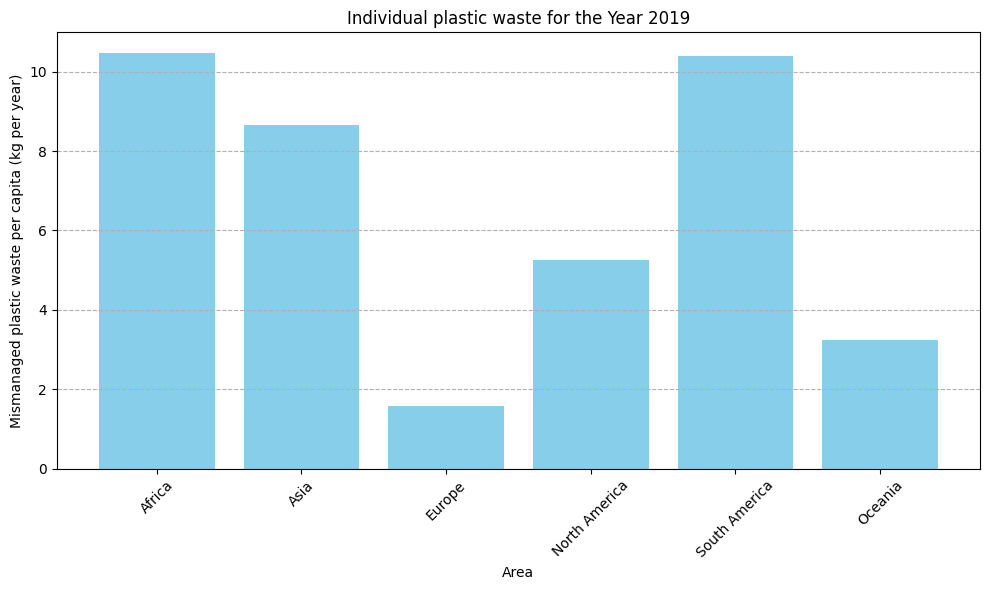

In [45]:


# Create the data
data = {
    'Area': ['Africa', 'Asia', 'Europe', 'North America', 'South America', 'Oceania'],
    'Value': [10.465928, 8.667235, 1.580226, 5.257716, 10.4, 3.240268],
    'Year': [2019] * 6  # Year is constant at 2019 for all entries
}

# Create a DataFrame
df = pd.DataFrame(data)

# Set the figure size for better clarity
plt.figure(figsize=(10, 6))

# Create the bar chart
plt.bar(df['Area'], df['Value'], color='skyblue')

# Add title and labels
plt.title('Individual plastic waste for the Year 2019')
plt.xlabel('Area')
plt.ylabel('Mismanaged plastic waste per capita (kg per year)')

# Show the plot
plt.grid(axis='y', linestyle='--')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()




In [46]:
'''

To calculate the median mismanaged plastic waste per capita for each region (e.g., North America, Asia, Africa, etc.), I will compute the values based on the provided data. Let's proceed with this calculation.

Here are the median values of mismanaged plastic waste per capita (kg per year) for each region:

Africa: 10.885 kg
Asia: 9.085 kg
Australia: 0.210 kg
Europe: 2.475 kg
North America: 6.905 kg
Oceania: 5.160 kg ​​

'''

"\n\nTo calculate the median mismanaged plastic waste per capita for each region (e.g., North America, Asia, Africa, etc.), I will compute the values based on the provided data. Let's proceed with this calculation.\n\nHere are the median values of mismanaged plastic waste per capita (kg per year) for each region:\n\nAfrica: 10.885 kg\nAsia: 9.085 kg\nAustralia: 0.210 kg\nEurope: 2.475 kg\nNorth America: 6.905 kg\nOceania: 5.160 kg \u200b\u200b\n\n"

In [47]:
df4_cleaned = df4.dropna()

In [49]:
df4_cleaned.sort_values(
    by='Mismanaged plastic waste per capita (kg per year)', 
    ascending=False
).head()



,Entity,Code,Year,Mismanaged plastic waste per capita (kg per year)
27,Comoros,COM,2019,69.515864
151,Trinidad and Tobago,TTO,2019,52.429391
143,Suriname,SUR,2019,39.471601
116,Philippines,PHL,2019,37.230963
164,Zimbabwe,ZWE,2019,35.839194


In [50]:
df4_cleaned.sort_values(
    by='Mismanaged plastic waste per capita (kg per year)', 
    ascending=True
).head(10)

,Entity,Code,Year,Mismanaged plastic waste per capita (kg per year)
137,Somalia,SOM,2019,0.002720
106,North Korea,PRK,2019,0.012546
96,Montenegro,MNE,2019,0.025478
145,Syria,SYR,2019,0.029408
34,Denmark,DNK,2019,0.067568
52,Georgia,GEO,2019,0.076808
88,Maldives,MDV,2019,0.112994
95,Monaco,MCO,2019,0.128205
12,Belgium,BEL,2019,0.197937
7,Australia,AUS,2019,0.208943
